Epoch 1/50


C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5056 - loss: 0.6930 - val_accuracy: 0.6026 - val_loss: 0.6904
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5851 - loss: 0.6894 - val_accuracy: 0.6154 - val_loss: 0.6868
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5711 - loss: 0.6868 - val_accuracy: 0.6218 - val_loss: 0.6834
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5442 - loss: 0.6862 - val_accuracy: 0.6346 - val_loss: 0.6777
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5731 - loss: 0.6809 - val_accuracy: 0.6346 - val_loss: 0.6727
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5992 - loss: 0.6728 - val_accuracy: 0.6090 - val_loss: 0.6704
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5990 - loss: 0.6654 - val_accuracy: 0.6026 - val_loss: 0.6712
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5976 - loss: 0.6582 - val_accuracy: 0.5897 - val_loss: 0.6707
Ep

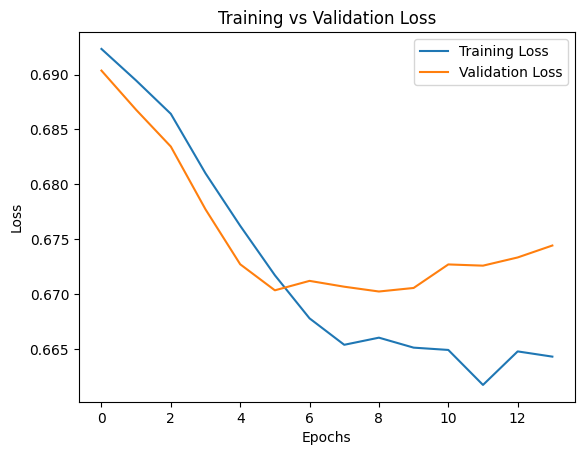

In [7]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load data
X = pd.read_csv(r"C:\Users\ADMIN\Desktop\Needed\ALGO\X.csv", header=None)
y = pd.read_csv(r"C:\Users\ADMIN\Desktop\Needed\ALGO\y.csv", header=None)

# Reshape X for LSTM input (assuming 1 time step per sample)
X = X.values.reshape(X.shape[0], 1, X.shape[1])  # Reshape to (num_samples, 1, num_features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure y is in {0, 1} for binary classification (if not already)
y_train = np.where(y_train == -1, 0, 1)
y_test = np.where(y_test == -1, 0, 1)

# Build the LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),  # Input shape is (1, num_features)
    Dropout(0.3),  # Increased dropout
    LSTM(32, return_sequences=False),
    Dropout(0.3),  # Increased dropout
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Single output for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Save the best model based on validation loss
# Save the best model based on validation loss with .keras extension
checkpoint = ModelCheckpoint(r"C:\Users\ADMIN\Desktop\Needed\ALGO\best_model.keras", monitor='val_loss', save_best_only=True)


# Train the model with callbacks
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,  # Increase epochs, but will stop early if necessary
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping, checkpoint]
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Predict and evaluate accuracy
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(f"Prediction Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the final model after training


In [19]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler

# Load the pre-trained model
model = load_model(r"C:\Users\ADMIN\Desktop\Needed\ALGO\lstm_binary_classification_model.h5")

# Function to reshape and preprocess the input data
def preprocess_input(input_data):
    # Convert the input data to a numpy array
    input_values = np.array(input_data)
    
    # Reshape the data to fit the LSTM input shape (5 windows, each with 4 features)
    input_values = input_values.reshape(1, 5, 4)  # Shape should be (1, 5, 4) for 5 windows and 4 features per window
    
    # Optional: Normalize the data (if required)
    # scaler = StandardScaler()
    # input_values = scaler.fit_transform(input_values.reshape(-1, 4)).reshape(1, 5, 4)
    
    return input_values

# Function to predict the outcome
def predict_outcome():
    try:
        # Input the 5 windows of data (each with 4 features)
        input_data = []
        print("Enter the data for 5 windows, each with 4 features (e.g., [1, 2, 3, 4]):")
        
        for i in range(5):
            window_data = input(f"Enter data for window {i+1}: ")
            window_values = list(map(float, window_data.strip("[]").split(',')))  # Convert input string to list of floats
            input_data.append(window_values)
        
        # Preprocess the input data
        processed_data = preprocess_input(input_data)
        
        # Make the prediction using the trained model
        prediction = model.predict(processed_data)
        
        # Display the result
        prediction = (prediction > 0.5).astype(int)  # Convert the output to 0 or 1
        print(f"The predicted outcome is: {prediction[0][0]}")
    
    except Exception as e:
        print(f"Error occurred: {e}")

# Run the prediction function
predict_outcome()


Enter the data for 5 windows, each with 4 features (e.g., [1, 2, 3, 4]):


Enter data for window 1:  (-1,0.025974026,0.025316456,0)


Error occurred: could not convert string to float: '(-1'
